In [1]:
! pip install sklearn-pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions
# change pycox import datasets and df= read.csv

In [2]:
unpickled_days260_curve_wait=pd.read_pickle("D:/UNOS_NEW/days260_curve_wait1_redo.pkl")
unpickled_days260_curve_wait

,0
0.000000,0.998988
20.277777,0.989468
40.555554,0.979948
60.833331,0.970428
81.111108,0.960908
...,...
1743.888867,0.192366
1764.166650,0.160280
1784.444434,0.128194
1804.722217,0.096108


In [3]:
days260_curve_wait=unpickled_days260_curve_wait.iloc[0:14,]

In [4]:
days260_curve_wait

,0
0.000000,0.998988
20.277777,0.989468
40.555554,0.979948
60.833331,0.970428
81.111108,0.960908
101.388885,0.951388
121.666663,0.941867
141.944440,0.932347
162.222217,0.922827
182.499994,0.913307


In [5]:
unpickled_days260_curve_no=pd.read_pickle("D:/UNOS_NEW/days260_curve_no1_redo.pkl")
unpickled_days260_curve_no

,0
0.000000,0.998900
20.277777,0.981559
40.555554,0.964218
60.833331,0.946877
81.111108,0.929536
...,...
1743.888867,0.150224
1764.166650,0.126544
1784.444434,0.102865
1804.722217,0.079185


In [6]:
days260_curve_no_3yr=unpickled_days260_curve_no.iloc[1:41,]

In [7]:
days260_curve_no_3yr

,0
20.277777,0.981559
40.555554,0.964218
60.833331,0.946877
81.111108,0.929536
101.388885,0.912195
121.666663,0.894854
141.944440,0.877514
162.222217,0.860173
182.499994,0.842832
202.777771,0.825491


In [8]:
days260_curve_no_3yr=days260_curve_no_3yr*0.866018

In [9]:
days260_curve_no_3yr

,0
20.277777,0.850048
40.555554,0.835030
60.833331,0.820013
81.111108,0.804995
101.388885,0.789978
121.666663,0.774960
141.944440,0.759943
162.222217,0.744925
182.499994,0.729908
202.777771,0.714890


In [10]:
surv_260_3yrs=days260_curve_wait.append(days260_curve_no_3yr, sort=False)

In [11]:
surv_260_3yrs.reset_index(inplace=True)

In [12]:
surv_260_3yrs=surv_260_3yrs.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_10992/2047685144.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  surv_260_3yrs=surv_260_3yrs.drop('index', 1)


In [13]:
surv_260_3yrs

,0
0,0.998988
1,0.989468
2,0.979948
3,0.970428
4,0.960908
5,0.951388
6,0.941867
7,0.932347
8,0.922827
9,0.913307


In [14]:
unpickled_days260_curve_have=pd.read_pickle("D:/UNOS_NEW/days260_curve_have1_redo.pkl")
unpickled_days260_curve_have

,0
0.000000,0.978502
20.266667,0.973488
40.533334,0.968474
60.800002,0.963460
81.066669,0.958446
...,...
1742.933350,0.177907
1763.200012,0.157239
1783.466675,0.136571
1803.733337,0.115903


In [15]:
unpickled_days260_curve_have.reset_index(inplace=True)

In [16]:
unpickled_days260_curve_have

,index,0
0,0.000000,0.978502
1,20.266667,0.973488
2,40.533334,0.968474
3,60.800002,0.963460
4,81.066669,0.958446
...,...,...
86,1742.933350,0.177907
87,1763.200012,0.157239
88,1783.466675,0.136571
89,1803.733337,0.115903


In [17]:
unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)

C:\Users\xiaoz\AppData\Local\Temp/ipykernel_10992/1059493067.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  unpickled_days260_curve_have=unpickled_days260_curve_have.drop('index', 1)


In [18]:
unpickled_days260_curve_have

,0
0,0.978502
1,0.973488
2,0.968474
3,0.963460
4,0.958446
...,...
86,0.177907
87,0.157239
88,0.136571
89,0.115903


In [19]:
days260_curve_have_3yrs=unpickled_days260_curve_have.iloc[0:54,]

In [20]:
days260_curve_have_3yrs

,0
0,0.978502
1,0.973488
2,0.968474
3,0.963460
4,0.958446
5,0.953431
6,0.948417
7,0.943403
8,0.938389
9,0.933375


In [21]:
surv260_3yrs=pd.concat([surv_260_3yrs,days260_curve_have_3yrs],axis=1)

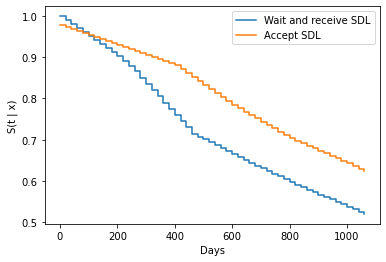

In [23]:
surv260_3yrs.plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Days')
plt.xticks(np.arange(55),[ 0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,
                         800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1080])
plt.locator_params(axis='x',nbins=6)
plt.legend(["Wait and receive SDL","Accept SDL"])
plt.savefig("D:/UNOS_NEW/days260 curves for article final_redo.jpg")